## 코드

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)

In [3]:
df1 = pd.read_csv('data_2017.csv',engine = 'python')
df2 = pd.read_csv('data_2018.csv')

In [4]:
frames = [df1, df2]
df = pd.concat(frames)

In [5]:
df = df.rename(columns={"연령대코드(5세단위)":"연령대 코드", 
                        "신장(5Cm단위)":"신장", 
                        "체중(5Kg단위)":"체중",
                        "식전혈당(공복혈당)":"식전혈당"})

In [6]:
df = df.drop(['기준년도', '가입자일련번호', '시도코드', '총콜레스테롤','트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', 
              '구강검진수검여부','치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', 
              '치석', '데이터공개일자'], axis=1)

In [7]:
df.columns

Index(['성별코드', '연령대 코드', '신장', '체중', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)',
       '청력(우)', '수축기혈압', '이완기혈압', '식전혈당', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부'],
      dtype='object')

In [8]:
df.describe()

,성별코드,연령대 코드,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,1.999320e+06,1.999564e+06,1.999545e+06,1.999625e+06,1.999627e+06,1.994251e+06,1.994252e+06,1.994043e+06,1.994034e+06,1.984838e+06,1.994051e+06,1.994053e+06,1.994052e+06,1.994049e+06,1.999622e+06,1.644521e+06
mean,1.466995e+00,1.056190e+01,1.622604e+02,6.342898e+01,8.134754e+01,9.786358e-01,9.762449e-01,1.032698e+00,1.031518e+00,1.225481e+02,7.606142e+01,1.006600e+02,1.425832e+01,1.095813e+00,8.633026e-01,2.614770e+01,2.601790e+01,3.739504e+01,1.607232e+00,6.956865e-01
std,4.989096e-01,2.860501e+00,9.310089e+00,1.262693e+01,1.106285e+01,6.073918e-01,6.047442e-01,1.778441e-01,1.747127e-01,1.459186e+01,9.954033e+00,2.418251e+01,1.583889e+00,4.390614e-01,4.986576e-01,2.501259e+01,2.678962e+01,5.061595e+01,8.176123e-01,4.601162e-01
min,1.000000e+00,5.000000e+00,1.250000e+02,2.500000e+01,1.000000e+00,1.000000e-01,1.000000e-01,1.000000e+00,1.000000e+00,5.800000e+01,2.700000e+01,2.300000e+01,5.000000e-01,1.000000e+00,1.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,8.000000e+00,1.550000e+02,5.500000e+01,7.450000e+01,7.000000e-01,7.000000e-01,1.000000e+00,1.000000e+00,1.120000e+02,7.000000e+01,8.900000e+01,1.320000e+01,1.000000e+00,7.000000e-01,1.900000e+01,1.500000e+01,1.600000e+01,1.000000e+00,0.000000e+00
50%,1.000000e+00,1.100000e+01,1.600000e+02,6.000000e+01,8.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.210000e+02,7.600000e+01,9.600000e+01,1.430000e+01,1.000000e+00,8.000000e-01,2.300000e+01,2.000000e+01,2.300000e+01,1.000000e+00,1.000000e+00
75%,2.000000e+00,1.300000e+01,1.700000e+02,7.000000e+01,8.800000e+01,1.200000e+00,1.200000e+00,1.000000e+00,1.000000e+00,1.310000e+02,8.200000e+01,1.050000e+02,1.540000e+01,1.000000e+00,1.000000e+00,2.900000e+01,3.000000e+01,4.000000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,1.800000e+01,1.900000e+02,1.400000e+02,9.990000e+02,9.900000e+00,9.900000e+00,2.000000e+00,2.000000e+00,2.730000e+02,1.850000e+02,8.720000e+02,2.500000e+01,6.000000e+00,9.800000e+01,9.999000e+03,7.210000e+03,9.990000e+02,3.000000e+00,1.000000e+00


## null 값 정리

In [9]:
df.isnull().sum()

성별코드               0
연령대 코드             0
신장                 0
체중                 0
허리둘레             680
시력(좌)            436
시력(우)            455
청력(좌)            375
청력(우)            373
수축기혈압           5749
이완기혈압           5748
식전혈당            5957
혈색소             5966
요단백            15162
혈청크레아티닌         5949
(혈청지오티)AST      5947
(혈청지오티)ALT      5948
감마지티피           5951
흡연상태             378
음주여부          355479
dtype: int64

In [10]:
#식전혈당이 없을 시 드랍
#음주여부 데이터에 1만 있음. 0이 누락된 것으로 판단
df['음주여부'] = df['음주여부'].fillna(0)
df = df.dropna()

In [11]:
df = df.loc[df["허리둘레"] >= 40] #허리둘레 이상치 있는 행 제거
df = df.loc[df["허리둘레"] <= 140]

## BMI

In [12]:
df_weight = df[['신장', '체중']].copy()
#체중(kg)을 신장(m)의 제곱으로 나눈 값(체중(kg)/신장(m2))
temp = df_weight['신장']/100
df_bmi = round(df_weight['체중'] / (temp * temp), 1)
#세계보건기구 아시아태평양지역과 대한비만학회
#BMI < 25 kg/m2 : 저체중+정상 0
#BMI ≥ 25 kg/m2 : 과체중 1
#BMI ≥ 30 kg/m2 : 비만 2
df_bmi.loc[df_bmi < 25] = 0
df_bmi.loc[(df_bmi >= 25) & (df_bmi < 30)] = 1
df_bmi.loc[df_bmi >= 30] = 2
df['비만여부'] = df_bmi
df = df.drop(['체중', '신장'], axis = 1)

## 고혈압

In [13]:
df_pressure = df[['이완기혈압', '수축기혈압']].copy()
# 정상: 0 / 120~139/80~89 전단계: 1/  140~159/90~99 1기:2 / 160/100 2기:3
df_pressure.loc[(df_pressure['수축기혈압'] < 120) & (df_pressure['이완기혈압'] < 80), '고혈압 여부'] = 0
df_pressure.loc[((df_pressure['수축기혈압'] >= 120) & (df_pressure['수축기혈압'] < 140))|
                ((df_pressure['이완기혈압'] >= 80) & (df_pressure['이완기혈압'] < 90)), '고혈압 여부'] = 1
df_pressure.loc[((df_pressure['수축기혈압'] >= 140) & (df_pressure['수축기혈압'] < 160))|
                ((df_pressure['이완기혈압'] >= 90) & (df_pressure['이완기혈압'] < 99)), '고혈압 여부'] = 2
df_pressure.loc[(df_pressure['수축기혈압'] >=160) | (df_pressure['이완기혈압'] >= 100), '고혈압 여부'] = 3
df['고혈압'] = df_pressure['고혈압 여부']

## 시력

In [14]:
#9.9 값 null 값 처리 후 평균으로 채움
df_eyes = df[['시력(좌)', '시력(우)']].copy()
df_eyes.loc[df_eyes['시력(좌)'] == 9.9,'시력(좌)'] = np.nan
df_eyes.loc[df_eyes['시력(우)'] == 9.9,'시력(우)'] = np.nan
df_eyes['시력(좌)'] = df_eyes['시력(좌)'].fillna(round(df_eyes['시력(좌)'].mean(), 1))
df_eyes['시력(우)'] = df_eyes['시력(우)'].fillna(round(df_eyes['시력(우)'].mean(), 1))
df['시력(좌)'] = df_eyes['시력(좌)']
df['시력(우)'] = df_eyes['시력(우)']
df_eyes.isnull().sum()

시력(좌)    0
시력(우)    0
dtype: int64

## 청력

In [15]:
#정상: 0 한쪽이 안 좋음:1 둘 다 안 좋음:2
df_ear = df[['청력(좌)', '청력(우)']].copy()
df_ear.loc[(df_ear['청력(좌)'] == 1) & (df_ear['청력(우)'] == 1), '청력'] =0
df_ear.loc[(df_ear['청력(좌)'] == 2) & (df_ear['청력(우)'] == 1), '청력'] =1
df_ear.loc[(df_ear['청력(좌)'] == 1) & (df_ear['청력(우)'] == 2), '청력'] =1
df_ear.loc[(df_ear['청력(좌)'] == 2) & (df_ear['청력(우)'] == 2), '청력'] =2
df['청력'] = df_ear['청력']
df = df.drop(['청력(좌)', '청력(우)'], axis=1)

## 상관계수

In [16]:
df_corr = df.corr()

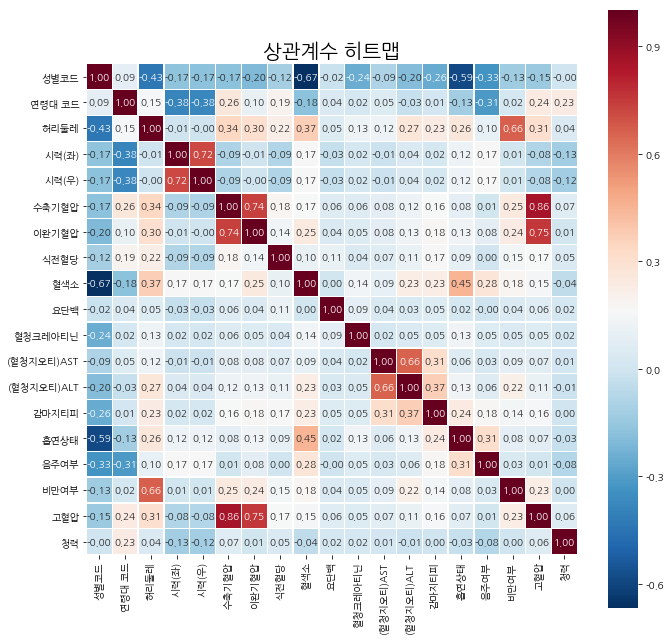

In [17]:
plt.subplots(figsize=(11, 11))
ax = sns.heatmap(df_corr, annot=True,fmt=".2f", linewidth=0.3, square = True, cmap='RdBu_r')
plt.title('상관계수 히트맵', fontsize=20)
plt.show() 

In [18]:
df_sorted = df_corr['식전혈당'].sort_values(ascending=False)
df_sorted = df_sorted.drop(['식전혈당'])
print(df_sorted)

허리둘레          0.222206
연령대 코드        0.194888
수축기혈압         0.182927
감마지티피         0.167902
고혈압           0.166222
비만여부          0.145095
이완기혈압         0.135568
요단백           0.113147
(혈청지오티)ALT    0.111342
혈색소           0.102601
흡연상태          0.088168
(혈청지오티)AST    0.065117
청력            0.046320
혈청크레아티닌       0.042988
음주여부          0.000494
시력(우)        -0.086531
시력(좌)        -0.087214
성별코드         -0.119129
Name: 식전혈당, dtype: float64


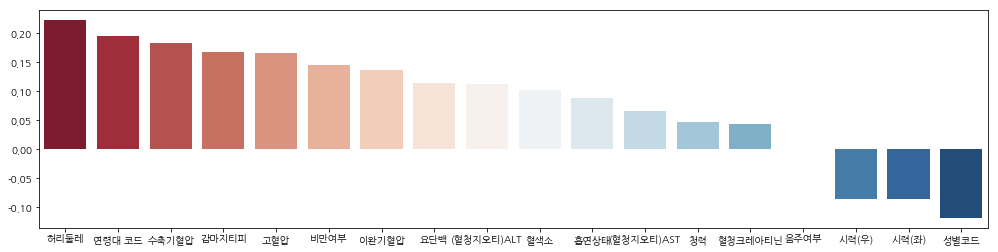

In [19]:
plt.subplots(figsize=(17,4))
sns.barplot(x = df_sorted.index, y = df_sorted.values,palette='RdBu')